<a href="https://colab.research.google.com/github/lucascatunda/Imersao_dados_4_2022_Alura/blob/main/Aula_01_Pesquisa_de_Im%C3%B3veis_em_S%C3%A3o_Paulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 01**


Primeiramente, vamos importar o banco de dados para o nosso notebook. Para isso, primeiramente, importamos os banco de dados e chamados o conteúdo presente no github.

In [1]:
import pandas as pd

dados = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
df = pd.read_csv(dados)

Para checar se os dados estão devidamente estruturados, chamamos a função head() para avaliar a estrutura dos 5 primeiros valores da tabela.

In [2]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Uma outra forma de avaliar o banco de dados seria de selecionar aleatoriamente um valor chamando a função .sample()

In [3]:
df.sample()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9208,NaN,Sumaré,São Paulo,430,2,5,5,R$ 2.000.000


Agora, com o banco de dados estruturado, vamos definir o tipo de valor presente em cada coluna (float64, object, string...). Para isso chamamos a função .info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


Por exemplo, podemos somar o número de casas que apresentam o bairro "Vila Mariana"

In [5]:
sum((df["Bairro"] == "Vila Mariana"))

184

Podemos montar um conjunto de dados que apresenta apenas casas que estão no bairro Vila Mariana. Utilizamos um tipo de filtro query para fazer esta operação.

In [6]:
vila_mariana = "Vila Mariana"
imoveis_vila_mariana = df.query("Bairro == @vila_mariana")
imoveis_vila_mariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


Uma segunda forma de selecionar as casas do bairro vila mariana seria aplicar o segundo método de filtragem, porém vale destacar que por este método, é necessário reestruturar a tabela utilizando a função DataFrame.

In [7]:
imoveis_vila_mariana2 = df[df["Bairro"] == "Vila Mariana"]
imoveis_vila_mariana2 = pd.DataFrame(data=imoveis_vila_mariana2)
imoveis_vila_mariana2

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


Aplicando a função describe(), podemos estimar alguns valores, por estatística descritiva, das casas de Vila Mariana

In [8]:
imoveis_vila_mariana.describe()

,Metragem,Quartos,Banheiros,Vagas
count,184.000000,184.000000,184.000000,184.000000
mean,233.619565,3.375000,3.228261,2.929348
std,91.467315,0.983817,1.310765,1.801762
min,60.000000,1.000000,1.000000,1.000000
25%,166.000000,3.000000,2.000000,2.000000
50%,235.500000,3.000000,3.000000,2.000000
75%,285.000000,4.000000,4.000000,4.000000
max,650.000000,11.000000,8.000000,10.000000


In [9]:
n_imoveis_bairro = df.groupby(df['Bairro']).describe()
n_imoveis_bairro = pd.DataFrame(n_imoveis_bairro)
n_imoveis_bairro.head(20)

Metragem                                         \
                             count        mean         std    min     25%   
Bairro                                                                      
Aclimação                     88.0  253.056818  159.140245  104.0  165.00   
Alto da Boa Vista              8.0  418.875000  111.880596  315.0  347.50   
Alto da Lapa                  86.0  294.337209  187.674036   46.0  151.25   
Alto da Mooca                 20.0  270.050000  237.306924   84.0  133.75   
Alto de Pinheiros            409.0  433.444988  145.676574  100.0  344.00   
Aricanduva                     1.0  278.000000         NaN  278.0  278.00   
Balneário Mar Paulista         1.0  250.000000         NaN  250.0  250.00   
Barra Funda                   18.0  135.444444   73.375923   44.0   88.25   
Barro Branco (Zona Norte)     10.0  489.000000  151.891774  215.0  355.00   
Bela Aliança                  21.0  345.476190  157.375862  144.0  235.00   
Bela Vista                     1.0  190.000000         NaN  190.0  190.00   
Belenzinho                    13.0  215.692308   73.413651  124.0  140.00   
Boaçava                      115.0  512.026087  189.136053  200.0  410.00   
Bom Retiro                     2.0  336.500000    3.535534  334.0  335.25   
Bortolândia                    3.0  151.666667   44.814432  100.0  137.50   
Bosque da Saúde              135.0  247.592593  130.177106   70.0  152.50   
Brasilândia                    4.0   83.750000    2.500000   80.0   83.75   
Brooklin                      36.0  339.416667  204.500559   80.0  182.50   
Brooklin Novo                 10.0  290.300000   62.173681  175.0  245.00   
Brooklin Paulista            247.0  323.676113  158.535909   70.0  205.00   

                                                 Quartos            ...  \
                             50%     75%     max   count      mean  ...   
Bairro                                                              ...   
Aclimação                  227.5  300.00  1500.0    88.0  3.318182  ...   
Alto da Boa Vista          378.0  448.75   595.0     8.0  4.125000  ...   
Alto da Lapa               255.0  363.75  1133.0    86.0  3.151163  ...   
Alto da Mooca              182.5  221.25   805.0    20.0  3.300000  ...   
Alto de Pinheiros          412.0  505.00  1530.0   409.0  3.938875  ...   
Aricanduva                 278.0  278.00   278.0     1.0  3.000000  ...   
Balneário Mar Paulista     250.0  250.00   250.0     1.0  4.000000  ...   
Barra Funda                122.5  168.75   305.0    18.0  2.500000  ...   
Barro Branco (Zona Norte)  600.0  603.75   605.0    10.0  3.500000  ...   
Bela Aliança               300.0  400.00   655.0    21.0  3.333333  ...   
Bela Vista                 190.0  190.00   190.0     1.0  3.000000  ...   
Belenzinho                 230.0  255.00   335.0    13.0  3.000000  ...   
Boaçava                    440.0  600.00  1192.0   115.0  3.939130  ...   
Bom Retiro                 336.5  337.75   339.0     2.0  3.000000  ...   
Bortolândia                175.0  177.50   180.0     3.0  3.000000  ...   
Bosque da Saúde            205.0  290.50   650.0   135.0  3.407407  ...   
Brasilândia                 85.0   85.00    85.0     4.0  2.000000  ...   
Brooklin                   268.0  455.75   705.0    36.0  3.444444  ...   
Brooklin Novo              302.5  337.00   377.0    10.0  3.400000  ...   
Brooklin Paulista          286.0  406.00   874.0   247.0  3.534413  ...   

                          Banheiros        Vagas                             \
                                75%   max  count       mean       std   min   
Bairro                                                                        
Aclimação                       4.0   7.0   88.0   2.909091  1.672196   1.0   
Alto da Boa Vista               6.0   7.0    8.0   4.625000  1.302470   3.0   
Alto da Lapa                    5.0   8.0   86.0   3.906977  2.150939   1.0   
Alto da Mooca                   3.0   7.0   20.0   3.6

Podemos realizar um gráfico de box_plot que define de forma gráfica todos os valores observados pela função describe(). Para isso, iremos utilizar o pacote seaborn para definir este gráfico da seguinte forma:

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


Agora podemos desenvolver o gráfico de box plot de cada coluna presente na tabela describe()

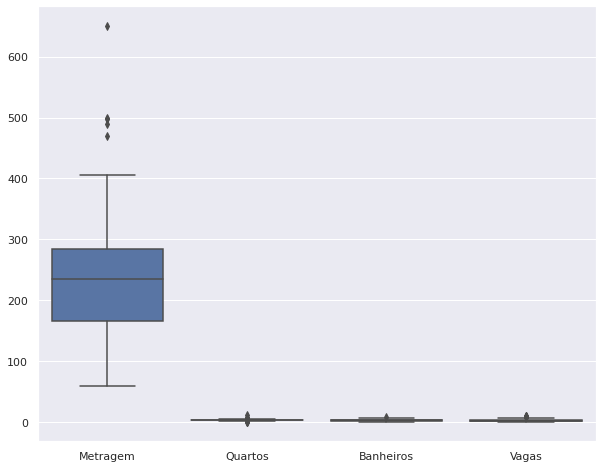

In [37]:
sns.set()
plt.figure(figsize=(10, 8))
vila_mariana_graph = sns.boxplot(data=imoveis_vila_mariana)

Percebe-se que o gráfico é pouco descritivo, pois os atributos apresentam dimensões diferentes, não sendo possível compará-los. Este gráfico seria mais indicado para comparar a metragem entre bairros, por exemplo. Para exemplificar, vamos utilizar apenas o valor metragem. Para isso, chamamos novamente a função.

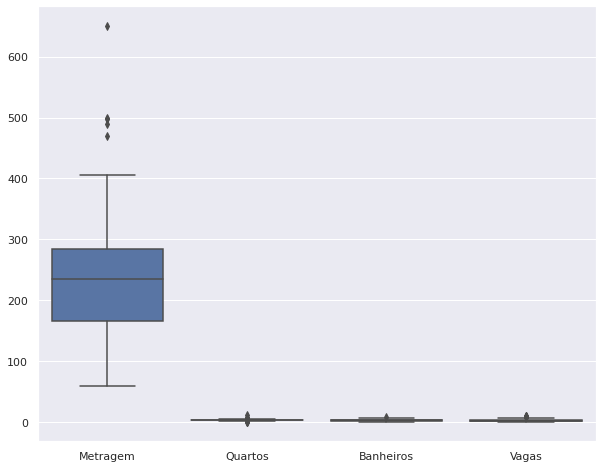

In [39]:
sns.set()
plt.figure(figsize=(10, 8))
vila_mariana_graph = sns.boxplot(data=imoveis_vila_mariana)

Podemos observar que o conjunto de dados em metragem apresenta um outlier em 650, indicando que a casa pode ser diferente do tamanho padrão em Vila_Mariana ou pode haver um problema em sua aquisição. No entanto, existem outliers em outras categorias (quartos, banheiros e vagas) que apresentam valores elevados, podendo estar associado a mesma casa que tem 650 m² de área. Para checarmos, vamos localizar a linha que apresenta tal informação.

In [13]:
imoveis_vila_mariana.loc[imoveis_vila_mariana['Metragem'] == 650]


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4166,Praça Cassiano Nogueira,Vila Mariana,São Paulo,650,4,1,8,R$ 3.200.000


A casa em questão apresenta 4 quartos, 1 banheiro e 8 vagas, o que pode justificar a área de 650 m². Podemos investigar o mesmo para outros atributos.

In [14]:
imoveis_vila_mariana.loc[imoveis_vila_mariana['Banheiros'] == 8]


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4261,Rua Professor Tranquilli,Vila Mariana,São Paulo,250,4,8,4,R$ 2.200.000


Estimando o maior valor de numero de banheiros (8), a casa é diferente daquela que tem metragem de 650 m². Quanto ao número de vagas, podemos fazer a seguinte avaliação: 

In [15]:
imoveis_vila_mariana.loc[imoveis_vila_mariana['Vagas'] == 10]


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
6154,Rua Sousa Ramos,Vila Mariana,São Paulo,250,3,1,10,R$ 2.500.000
6678,Rua Sousa Ramos,Vila Mariana,São Paulo,255,3,1,10,R$ 2.500.000


In [16]:
imoveis_vila_mariana.loc[imoveis_vila_mariana['Quartos'] == 11]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6628,"Rua Carlos Petit, 175",Vila Mariana,São Paulo,400,11,5,3,R$ 2.800.000


Observa-se que procurando lugares por vagas, existem duas linhas com informações próximas. Seria necessário entrar em contato com algum especialista para averiguar se de fato há duas casas com características semelhantes ou se a informação está duplicada. Essa e outras explorações podem ser feitas com os dados em questão. No caso, vamos para a resolução dos desafios para finalizarmos este primeiro notebook.

Desafios


1 - Realizar a média da metragem para cada um dos bairros (Paulo)

2 - 2 Formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas)

3 - Explorar alguns gráficos na documentação e aplicar na demais colunas do DF e tentar colocar alguma conclusão

4 - Pegar outras estatísticas dos dados, média, mediana, min, max.

5 - Descobrir quais são os bairros que não tem nome de rua.**bold text**

## 1 - Realizar a média da metragem para cada um dos bairros (Paulo)



Vamos primeiramente agrupar os imóveis por bairro. Para isso, utilizamos a função groupby e chamamos a função para realizar a estatística descritiva de cada atributo numerico (Banheiros, quartos, vagas).



In [17]:
media_metragem_bairro = df.groupby('Bairro').describe().round(2) #Agrupa os dados e nos trás informação de metragem por bairro.
media_metragem_bairro = pd.DataFrame(data=media_metragem_bairro['Metragem']) # Converte o grupo Metragem


Modificaremos, em seguida o nome dos atributos obtidos durante o agrupamento dos imóveis por bairro. Podemos, também, reorganizar os bairros por quantidade de imóveis contabilizados na cidade de são paulo. Bairros que apresentam muitos poucos imóveis podem gerar equivocos na aquisição de alguns valores estatísticos por não apresentar um número de amostras significativos. Portanto, vamos trabalhar com os 20 bairros com maiores números de imóveis. 

In [18]:
media_metragem_bairro.columns = ['count', 'mean', 'std', 'min', '25', '50', '75', 'max']
media_metragem_bairro = media_metragem_bairro.sort_values(by='count', ascending=False)
media_metragem_bairro

,count,mean,std,min,25,50,75,max
Bairro,,,,,,,,
Alto de Pinheiros,409.0,433.44,145.68,100.0,344.0,412.0,505.0,1530.0
Jardim Guedala,403.0,2486.64,37329.49,250.0,479.0,580.0,750.0,750000.0
Jardim Paulista,309.0,486.30,242.64,110.0,320.0,450.0,600.0,1205.0
Brooklin Paulista,247.0,323.68,158.54,70.0,205.0,286.0,406.0,874.0
Jardim Europa,240.0,561.57,263.57,120.0,340.0,552.5,705.0,1510.0
...,...,...,...,...,...,...,...,...
Vila Fernandes,1.0,180.00,NaN,180.0,180.0,180.0,180.0,180.0
Vila Fiat Lux,1.0,250.00,NaN,250.0,250.0,250.0,250.0,250.0
Educandário,1.0,135.00,NaN,135.0,135.0,135.0,135.0,135.0


In [19]:
media_metragem_bairro.head(20)


,count,mean,std,min,25,50,75,max
Bairro,,,,,,,,
Alto de Pinheiros,409.0,433.44,145.68,100.0,344.00,412.0,505.00,1530.0
Jardim Guedala,403.0,2486.64,37329.49,250.0,479.00,580.0,750.00,750000.0
Jardim Paulista,309.0,486.30,242.64,110.0,320.00,450.0,600.00,1205.0
Brooklin Paulista,247.0,323.68,158.54,70.0,205.00,286.0,406.00,874.0
Jardim Europa,240.0,561.57,263.57,120.0,340.00,552.5,705.00,1510.0
Cidade Jardim,230.0,697.33,312.94,260.0,480.00,605.0,840.75,1920.0
Vila Madalena,224.0,334.67,134.71,35.0,243.75,317.5,400.25,805.0
Pacaembu,222.0,512.81,339.63,130.0,326.25,417.0,518.25,2505.0
Planalto Paulista,195.0,324.35,177.02,80.0,217.50,285.0,382.50,1300.0


Vamos atribuir uma variável aos 20 bairros com maior numero de imoveis.

In [20]:
top20_media_metragem_bairro = media_metragem_bairro.head(20)
top20_media_metragem_bairro

,count,mean,std,min,25,50,75,max
Bairro,,,,,,,,
Alto de Pinheiros,409.0,433.44,145.68,100.0,344.00,412.0,505.00,1530.0
Jardim Guedala,403.0,2486.64,37329.49,250.0,479.00,580.0,750.00,750000.0
Jardim Paulista,309.0,486.30,242.64,110.0,320.00,450.0,600.00,1205.0
Brooklin Paulista,247.0,323.68,158.54,70.0,205.00,286.0,406.00,874.0
Jardim Europa,240.0,561.57,263.57,120.0,340.00,552.5,705.00,1510.0
Cidade Jardim,230.0,697.33,312.94,260.0,480.00,605.0,840.75,1920.0
Vila Madalena,224.0,334.67,134.71,35.0,243.75,317.5,400.25,805.0
Pacaembu,222.0,512.81,339.63,130.0,326.25,417.0,518.25,2505.0
Planalto Paulista,195.0,324.35,177.02,80.0,217.50,285.0,382.50,1300.0


Uma segunda forma de realizar o mesmo objetivo está descrito logo abaixo. A diferença é que as funções ao invés de serem realizados em duas linhas, foram feitas em apenas uma.

In [21]:
media_metragem_bairro2 = df.groupby("Bairro")
media_metragem_bairro2 = pd.DataFrame(data=media_metragem_bairro2["Metragem"].describe().round(2)).sort_values(by='count', ascending=False)
media_metragem_bairro2.head(20)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Alto de Pinheiros,409.0,433.44,145.68,100.0,344.00,412.0,505.00,1530.0
Jardim Guedala,403.0,2486.64,37329.49,250.0,479.00,580.0,750.00,750000.0
Jardim Paulista,309.0,486.30,242.64,110.0,320.00,450.0,600.00,1205.0
Brooklin Paulista,247.0,323.68,158.54,70.0,205.00,286.0,406.00,874.0
Jardim Europa,240.0,561.57,263.57,120.0,340.00,552.5,705.00,1510.0
Cidade Jardim,230.0,697.33,312.94,260.0,480.00,605.0,840.75,1920.0
Vila Madalena,224.0,334.67,134.71,35.0,243.75,317.5,400.25,805.0
Pacaembu,222.0,512.81,339.63,130.0,326.25,417.0,518.25,2505.0
Planalto Paulista,195.0,324.35,177.02,80.0,217.50,285.0,382.50,1300.0


As duas tabelas foram obtidas igualmente. Podemos construir um gráfico com a metragem média dos 20 bairros com maior número de imóveis.


In [22]:
top20_media_metragem_bairro_graph = df.groupby('Bairro').describe()
top20_media_metragem_bairro_graph = pd.DataFrame(top20_media_metragem_bairro_graph["Metragem"])
top20_media_metragem_bairro_graph.head(5)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Aclimação,88.0,253.056818,159.140245,104.0,165.00,227.5,300.00,1500.0
Alto da Boa Vista,8.0,418.875000,111.880596,315.0,347.50,378.0,448.75,595.0
Alto da Lapa,86.0,294.337209,187.674036,46.0,151.25,255.0,363.75,1133.0
Alto da Mooca,20.0,270.050000,237.306924,84.0,133.75,182.5,221.25,805.0
Alto de Pinheiros,409.0,433.444988,145.676574,100.0,344.00,412.0,505.00,1530.0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


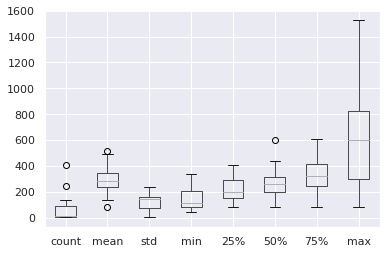

In [23]:
top20_media_metragem_bairro_graph.sort_values(by='count')
top20_media_metragem_bairro_graph.head(20).boxplot()

Vamos também fazer um histograma para observar a distribuição de metragem por bairro. Para isso vamos escrever o código abaixo.

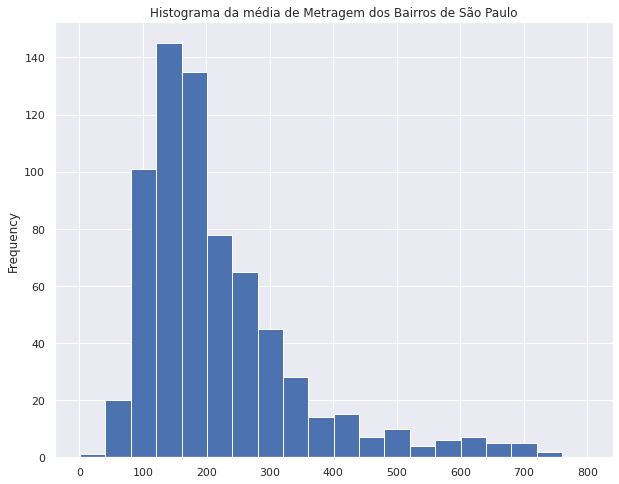

In [24]:
media_metragem_bairro['mean'].plot.hist(by=media_metragem_bairro['mean'], range=(1, 800), bins=20, figsize=(10,8), title='Histograma da média de Metragem dos Bairros de São Paulo')

Observa-se que boa parte dos bairros apresentam metragem média centrada entre 100 a 200 m², podendo estar atrelado ao tamanho da família e a renda média familiar. Imóveis com metragem acima desse intervalo podem estar atrelados a família com renda família acima da média. 

## 2 - 2 Formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas)


A primeira forma de selecionar o bairro em específico pode ser pelo código abaixo chamando a função .query()

In [25]:
planalto_paulista = df.query("Bairro == 'Planalto Paulista'")
planalto_paulista

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
75,Rua Francisco de Paula Brito,Planalto Paulista,São Paulo,250,3,4,4,R$ 2.190.000
79,Rua Elisa Rodrigues,Planalto Paulista,São Paulo,184,4,3,4,R$ 1.390.000
87,NaN,Planalto Paulista,São Paulo,119,2,2,2,R$ 670.000
116,Alameda dos Guainumbis,Planalto Paulista,São Paulo,200,4,6,3,R$ 2.014.000
...,...,...,...,...,...,...,...,...
9878,NaN,Planalto Paulista,São Paulo,200,3,3,3,R$ 680.000
9883,Alameda dos Tupinas,Planalto Paulista,São Paulo,405,4,6,4,R$ 1.550.000
9930,Avenida Odila,Planalto Paulista,São Paulo,262,3,6,4,R$ 1.500.000
9966,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000


A segunda forma pode ser realizado pela função loc que procura também especificamente por Bairros que apresentem como nome o bairro Planalto Paulista

In [26]:
bairro_planalto_paulista = df.loc[df['Bairro'] == 'Planalto Paulista']
bairro_planalto_paulista.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
75,Rua Francisco de Paula Brito,Planalto Paulista,São Paulo,250,3,4,4,R$ 2.190.000
79,Rua Elisa Rodrigues,Planalto Paulista,São Paulo,184,4,3,4,R$ 1.390.000
87,NaN,Planalto Paulista,São Paulo,119,2,2,2,R$ 670.000
116,Alameda dos Guainumbis,Planalto Paulista,São Paulo,200,4,6,3,R$ 2.014.000


## 3 - Explorar alguns gráficos na documentação e aplicar na demais colunas do DF e tentar colocar alguma conclusão

Vamos avaliar o conjunto de dados como um todo novamente por bairro selecionando novamente aqueles que mais apresentam imóveis catalogados por bairro. Vamos avaliar graficamente a metragem média, mediana e o grau de desvio desses valores por bairro. Para isso, podemos chamar o gráfico de boxplot que apresenta graficamente todos os valores obtidos pela função .describe() e, além disso, estimar valores fora do padrão (outliers). Vamos utilizar novamente os dados dos imóveis por bairro.

In [27]:
media_metragem_bairro.head(20)

,count,mean,std,min,25,50,75,max
Bairro,,,,,,,,
Alto de Pinheiros,409.0,433.44,145.68,100.0,344.00,412.0,505.00,1530.0
Jardim Guedala,403.0,2486.64,37329.49,250.0,479.00,580.0,750.00,750000.0
Jardim Paulista,309.0,486.30,242.64,110.0,320.00,450.0,600.00,1205.0
Brooklin Paulista,247.0,323.68,158.54,70.0,205.00,286.0,406.00,874.0
Jardim Europa,240.0,561.57,263.57,120.0,340.00,552.5,705.00,1510.0
Cidade Jardim,230.0,697.33,312.94,260.0,480.00,605.0,840.75,1920.0
Vila Madalena,224.0,334.67,134.71,35.0,243.75,317.5,400.25,805.0
Pacaembu,222.0,512.81,339.63,130.0,326.25,417.0,518.25,2505.0
Planalto Paulista,195.0,324.35,177.02,80.0,217.50,285.0,382.50,1300.0


Cada bairro apresenta o valor médio, mediana, os quartis, o desvio padrão (extremamente importante para determinar o grau de dispersão dos valores; o min e max. Alguns desses valores nos permitem construir o boxplot. Para isso, escrevemos o seguinte código:

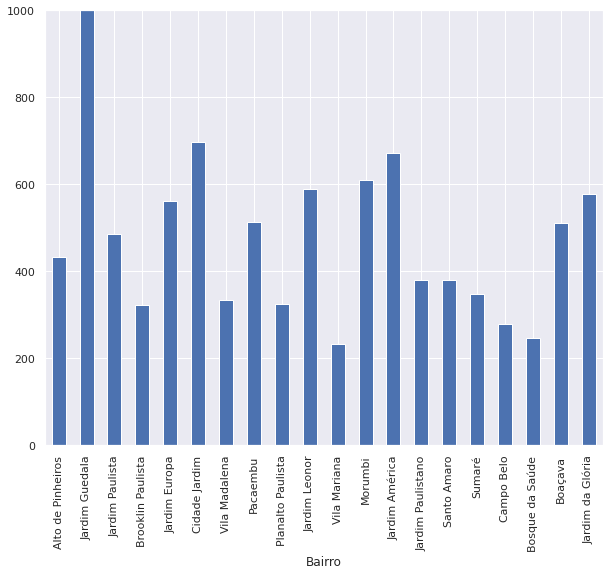

In [28]:
sns.set()
plt.figure(figsize=(10, 8))
plt.ylim(0,1000)
plt.xticks(rotation=90)
top20_media_metragem_bairro['mean'].plot.bar()

Existe um outlier no valor máximo de 750000. Vamos ignorar por enquanto esse valor e vamos limitar a escala do eixo y. Vamos repetir o código acima, porém acrescentando determinada informação.

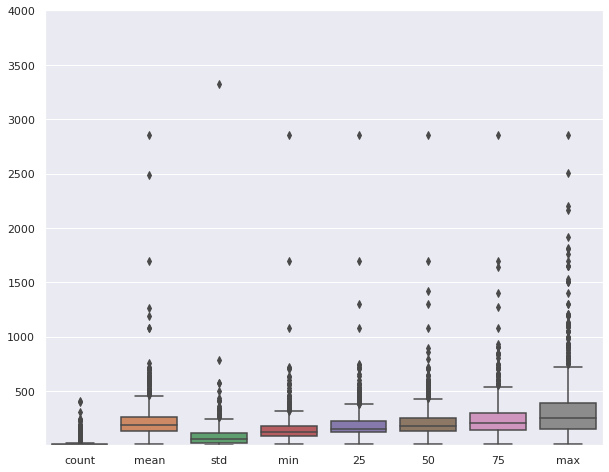

In [43]:
sns.set()
plt.figure(figsize=(10, 8))
plt.ylim(1,4000)
media_metragem_bairro_boxplot = sns.boxplot(data=media_metragem_bairro)

## 4 - Pegar outras estatísticas dos dados, média, mediana, min, max.

In [30]:
df.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


In [31]:
df_group = df.groupby('Bairro')
df_group = pd.DataFrame(data=df_group["Metragem"].describe().round(2)).sort_values(by='count', ascending=False)

In [32]:
df_group.head(20)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Alto de Pinheiros,409.0,433.44,145.68,100.0,344.00,412.0,505.00,1530.0
Jardim Guedala,403.0,2486.64,37329.49,250.0,479.00,580.0,750.00,750000.0
Jardim Paulista,309.0,486.30,242.64,110.0,320.00,450.0,600.00,1205.0
Brooklin Paulista,247.0,323.68,158.54,70.0,205.00,286.0,406.00,874.0
Jardim Europa,240.0,561.57,263.57,120.0,340.00,552.5,705.00,1510.0
Cidade Jardim,230.0,697.33,312.94,260.0,480.00,605.0,840.75,1920.0
Vila Madalena,224.0,334.67,134.71,35.0,243.75,317.5,400.25,805.0
Pacaembu,222.0,512.81,339.63,130.0,326.25,417.0,518.25,2505.0
Planalto Paulista,195.0,324.35,177.02,80.0,217.50,285.0,382.50,1300.0


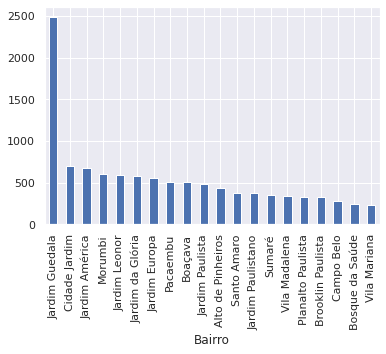

In [33]:
df_group['mean'].head(20).sort_values(ascending=False).plot.bar()

5 - Descobrir quais são os bairros que não tem nome de rua.**bold text**

In [34]:
bairro_semnome = df.groupby('Bairro')
bairro_semnome = pd.DataFrame(data=bairro_semnome['Bairro'].count().value_counts(ascending=False))
bairro_semnome

,Bairro
1,184
2,116
3,63
4,57
5,33
...,...
98,1
48,1
59,1
309,1
